# HAI(하이)! - Hecto AI Challenge : 2025 상반기 헥토 채용 AI 경진대회
- 링크: https://dacon.io/competitions/official/236493/overview/description
- 주제: 중고차 이미지 차종 분류 AI 모델 개발

# [1단계] 데이터 탐색 및 구조 이해

- 클래스 수: 총 396개 차종 -> 다중 클래스 분류, 클래스 간 유사도 높을 수 있음
- 이미지 분포 분석: 클래스별 데이터 수 균형 확인 -> 불균형 시 증감 필요
- 이미지 특성 확인: 정면/측면/후면/ 색상 다양성 등 -> 모델이 혼동할 수 있는 요소 분석
---
- 차량 앞뒤 사진이 함께 있다면, 부분적 attention 학습이 중요함

### 데이터 구조 파악 및 탐색

In [1]:
import os
import pandas as pd

# 데이터 경로 설정
base_dir = "./data"  # 여기서 "./data"는 train, test 폴더가 있는 디렉터리
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# 제출 샘플 불러오기
sample_submission = pd.read_csv(os.path.join(base_dir, "sample_submission.csv"))
test_csv = pd.read_csv(os.path.join(base_dir, "test.csv"))

print("Train 경로 내 클래스 수:", len(os.listdir(train_dir)))
print("Test 이미지 수:", len(test_csv))

Train 경로 내 클래스 수: 396
Test 이미지 수: 8258


### 클래스별 이미지 수 시각화

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

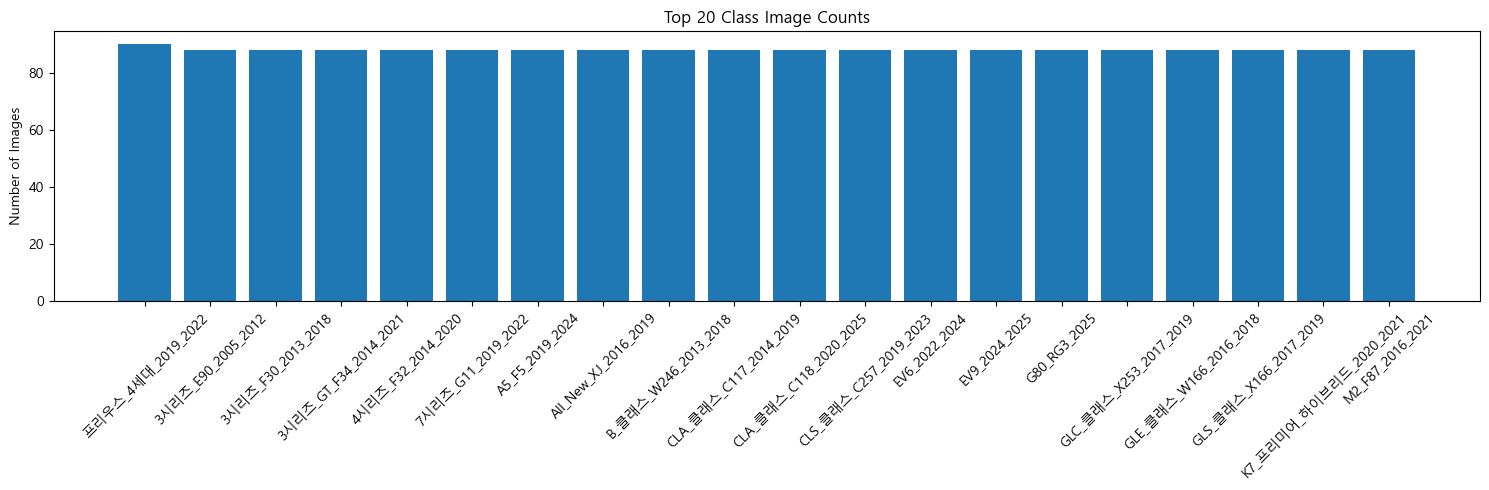

In [ ]:
# 각 클래스별 이미지 수 집계
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}

# 상위 20개 클래스 시각화
top_classes = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(15, 5))
plt.bar(top_classes.keys(), top_classes.values())
plt.title("Top 20 Class Image Counts")
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


In [4]:
import numpy as np

counts = list(class_counts.values())
print(f"최소 이미지 수: {np.min(counts)}")
print(f"최대 이미지 수: {np.max(counts)}")
print(f"평균 이미지 수: {np.mean(counts):.2f}")
print(f"중앙값: {np.median(counts)}")

최소 이미지 수: 57
최대 이미지 수: 90
평균 이미지 수: 83.68
중앙값: 85.0


# 클래스 이미지 수 히스토그램

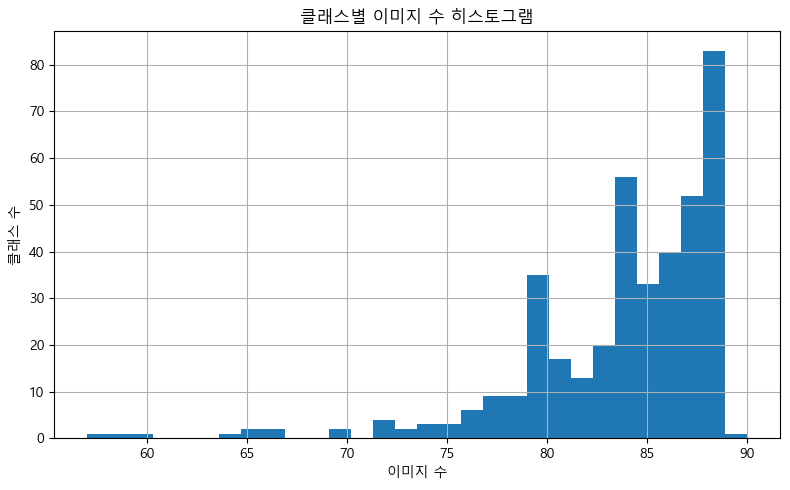

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(list(class_counts.values()), bins=30)
plt.title("클래스별 이미지 수 히스토그램")
plt.xlabel("이미지 수")
plt.ylabel("클래스 수")
plt.grid(True)
plt.tight_layout()
plt.show()

# EDA 요약
- 클래스 이미지 수: 대부분 80장 이상, 소수 클래스만 60장 미만으로 데이터 비교적 균형적
- 색상: 한 클래스 내에서 차량 색상이 다양함 -> 모델이 색에 의존하지 않고
 외형적 특징 학습해야 함
- 각도: 앞, 뒤. 옆 등 다양한 각도로 촬영됨 -> 다각도 특성 인식 가능한 모델 구조 또는 증강 전략 필요

In [6]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

ModuleNotFoundError: No module named 'torch'